## hello world Agent

In [2]:
!pip install langgraph

     ------------------------------------ 143.7/143.7 kB 775.9 kB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB ? eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB ? eta 0:00:00
     -------------------------------------- 441.4/441.4 kB 6.8 MB/s eta 0:00:00
     -------------------------------------- 367.7/367.7 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 121.2/121.2 kB ? eta 0:00:00
     -------------------------------------- 134.6/134.6 kB 8.3 MB/s eta 0:00:00
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
     ------------------------------------- 495.5/495.5 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: zstandard
    Found existing installation: zstandard 0.18.0
    Uninstalling zstandard-0.18.0:
      Successfully uninstalled zstandard-0.18.0


In [ ]:
from typing  import Dict, TypedDict
from langgraph.graph import StateGraph  # framework that help you design and manage the flow of your application using graph structures

In [ ]:
# create agentstate 
class AgentState(TypedDict):  # state schema
    message: str

# create a node 
def greeting_node(state: AgentState) -> AgentState:
    """Simple node that greeting message to the node"""
    state["message"] ="Hey " + state["message"] + ", how is your day going?"
    return state



In [14]:
# create a graph
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)  # add node to the graph
graph.set_entry_point("greeter")  # set entry node
graph.set_finish_point("greeter")  # set finish node
app = graph.compile()  # compile the graph


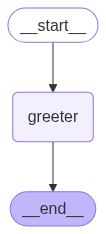

In [16]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))  # display the graph

In [17]:
result  = app.invoke(AgentState(message="Raju"))  # invoke the app with initial state

In [18]:
result["message"]

'Hey Raju, how is your day going?'